# The Bread Basket EDA

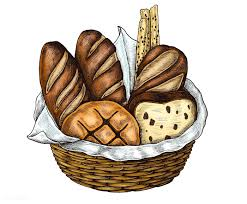

## Importing The Libraries

In [1]:
import datetime
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
plt.style.use('classic')
sns.set()

## Loading The Data

In [2]:
df = pd.read_csv('../input/the-bread-basket/bread basket.csv')

In [3]:
print(df.shape)
df.head()

(20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.isnull().sum().to_frame('missing_values')

,missing_values
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


In [5]:
print('A Total of {} different types of Item is sold in The Bread Basket'.format(len(df['Item'].unique())))

A Total of 94 different types of Item is sold in The Bread Basket


In [6]:
print('From the provided data, A Total of {} Transaction is made by The Bread Basket'.format(df['Transaction'].nunique()))

From the provided data, A Total of 9465 Transaction is made by The Bread Basket


## Feature Engg

In [7]:
day = []

for dt in df.date_time:
    calc_day = datetime.datetime.strptime(dt.split(' ')[0], '%d-%m-%Y').weekday()
    day.append(calendar.day_name[calc_day])
    
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['day'] = day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),  ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))


df.drop(['date_time'], axis=1, inplace=True)

df.rename(columns={'weekday_weekend': 'day_type'}, inplace=True)

df.head()



,Transaction,Item,period_day,day_type,date,time,day,month,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,Sunday,October,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,Sunday,October,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,Sunday,October,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,Sunday,October,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,Sunday,October,10


## EDA

Text(0.5, 1.0, 'Top 25 Items Sold in The Bread Basket')

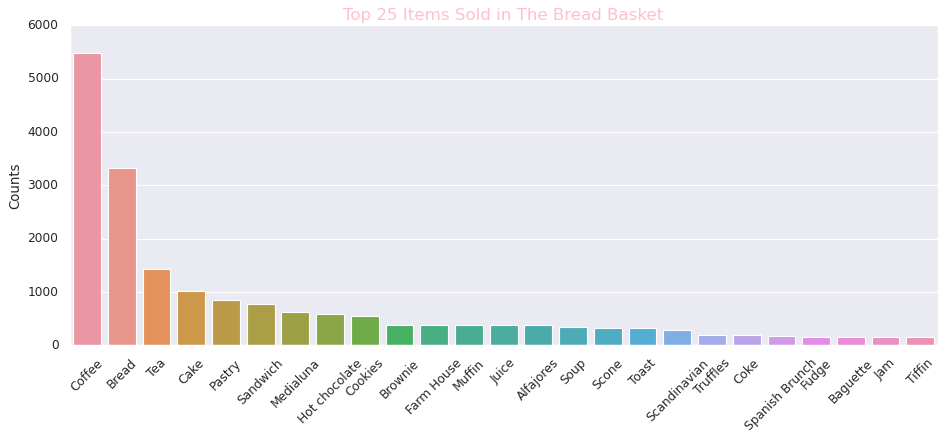

In [8]:
plt.figure(figsize=(14, 5))
sns.barplot(x=df.Item.value_counts().head(25).index, y=df.Item.value_counts().head(25))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 25 Items Sold in The Bread Basket', fontsize=15, color='pink')

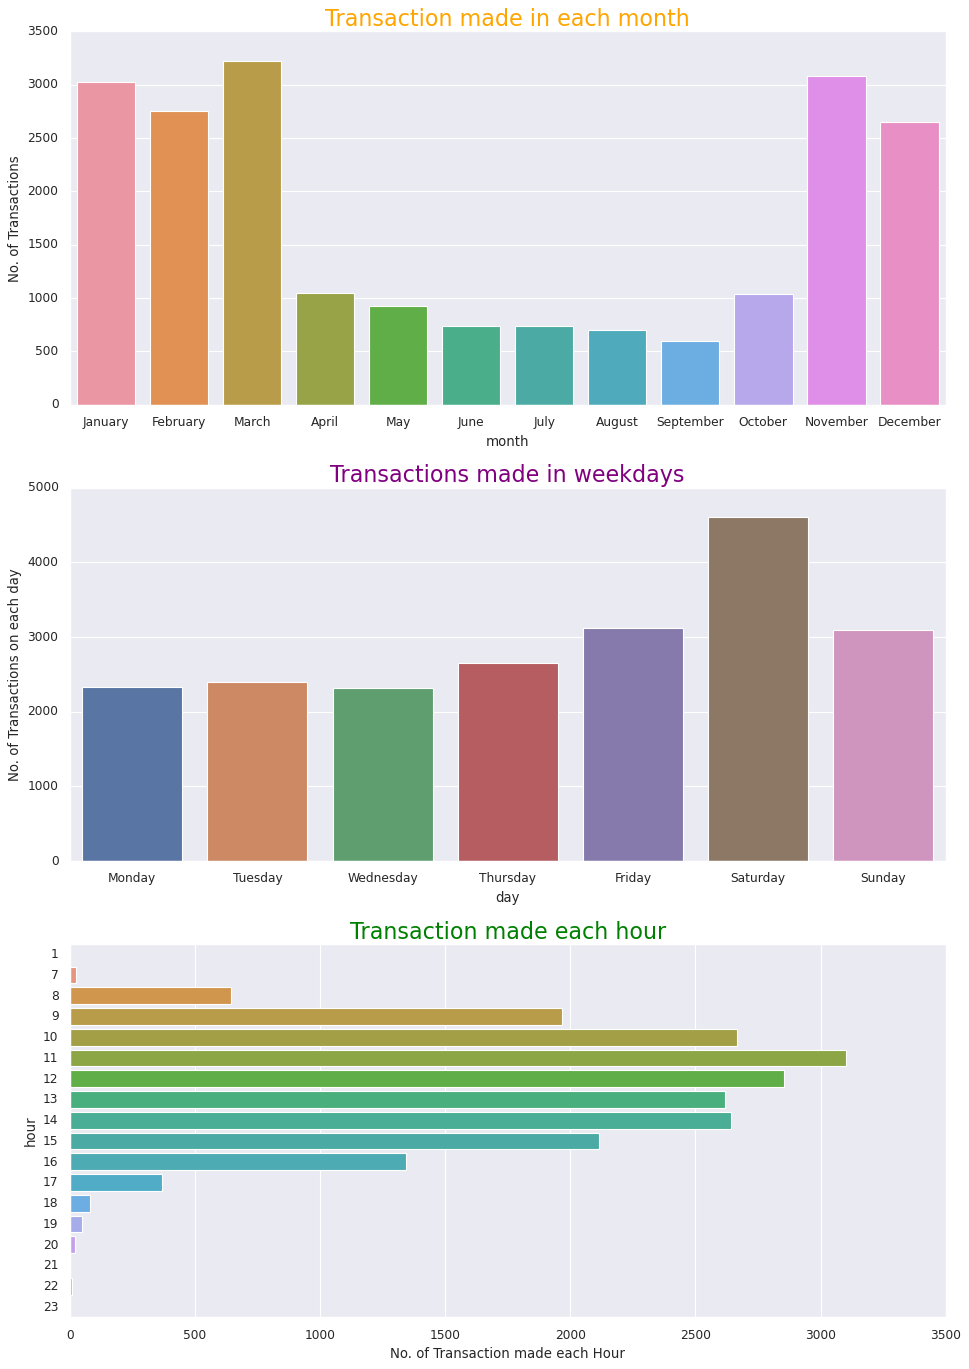

In [9]:
monthly_trans = df.groupby('month')['Transaction'].count().reset_index()
day_based_trans = df.groupby('day')['Transaction'].count().reset_index()
hourly_transaction = df.groupby('hour')['Transaction'].count().reset_index()

monthly_trans['order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
monthly_trans.sort_values('order', inplace=True)

day_based_trans['order'] = [5, 1, 6, 7, 4, 2, 3]
day_based_trans.sort_values('order', inplace=True)

fig = plt.figure(figsize=(12, 17), constrained_layout=True)
spec = gridspec.GridSpec(nrows=3, ncols=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[2, 0])

sns.barplot(x='month', y='Transaction', data=monthly_trans, ax=ax1)
ax1.set_ylabel('No. of Transactions')
ax1.set_title('Transaction made in each month', fontsize=20, color='orange')

sns.barplot(x='day', y='Transaction', data=day_based_trans, ax=ax2)
ax2.set_ylabel('No. of Transactions on each day')
ax2.set_title('Transactions made in weekdays', fontsize=20, color='purple')

sns.barplot(x='Transaction', y='hour', data=hourly_transaction,orient='h', ax=ax3)
ax3.set_xlabel('No. of Transaction made each Hour')
ax3.set_title('Transaction made each hour', fontsize=20, color='green')
plt.show()

Text(0.5, 0, 'period of the day')

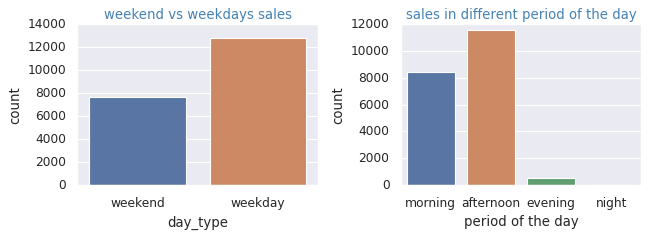

In [10]:
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2,figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])

sns.countplot(df['day_type'], ax=ax1)
ax1.set_title('weekend vs weekdays sales', color='steelblue')

sns.countplot(df['period_day'], ax=ax2)
ax2.set_title('sales in different period of the day', color='steelblue')
ax2.set_xlabel('period of the day')

In [11]:
df.sample(3)

,Transaction,Item,period_day,day_type,date,time,day,month,hour
6197,3097,Coffee,afternoon,weekday,2016-12-13,14:32:00,Tuesday,December,14
7992,4009,Bread,afternoon,weekday,2016-12-30,13:34:00,Friday,December,13
16426,7824,Tiffin,morning,weekday,2017-09-03,11:52:00,Thursday,September,11


Text(0.5, 1.0, ' Daily Transaction')

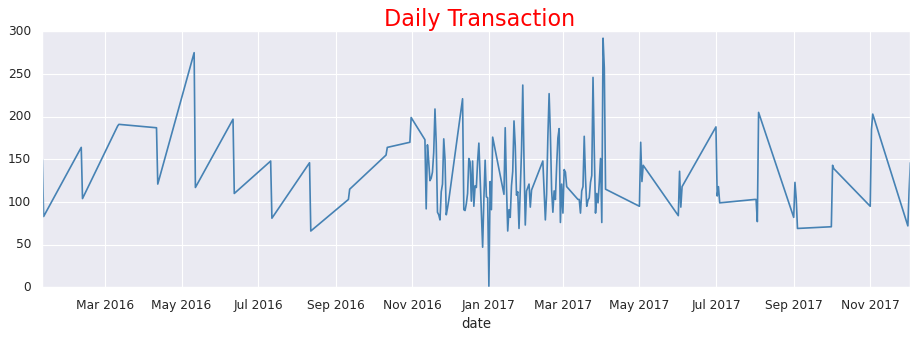

In [12]:
daily_trans = df.groupby('date')['Transaction'].count()
daily_trans.plot(kind='line', figsize=(14, 4), color='steelblue')
plt.title(' Daily Transaction', color='red', fontsize=20)

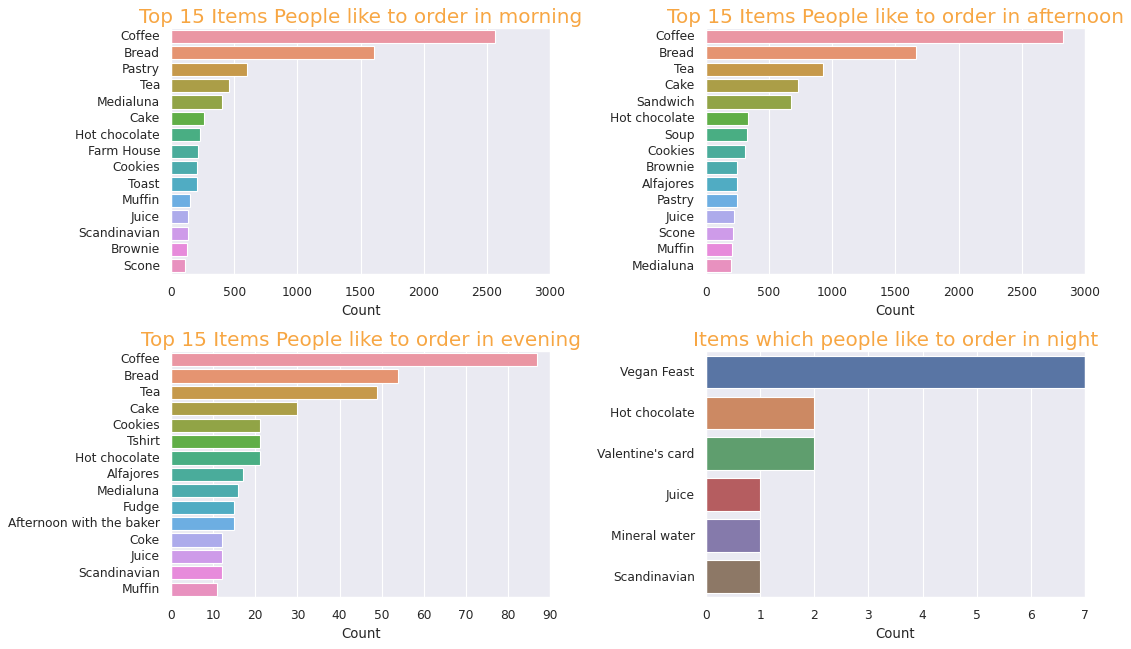

In [13]:
fig = plt.figure(figsize=(14, 8), constrained_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax1, ax2 = fig.add_subplot(spec[0, 0]), fig.add_subplot(spec[0, 1])
ax3, ax4 = fig.add_subplot(spec[1, 0]), fig.add_subplot(spec[1, 1])
ax = [ax1, ax2, ax3, ax4]
period = df.period_day.unique().tolist()

for i, j in zip(period, ax):
    da = df[df.period_day==str(i)]
    sns.barplot(y=da.Item.value_counts().head(15).index, x=da.Item.value_counts().head(15), orient='h', ax=j)
    j.set_title('Top 15 Items People like to order in {}'.format(str(i)), color='#f7a643', fontsize=18)
    j.set_xlabel('Count')
ax4.set_title('Items which people like to order in night', color='#f7a643', fontsize=18)
plt.show()

## As Coffee, Bread and Tea are running Peak in all conditions let's see what people like other than this in different Seasons

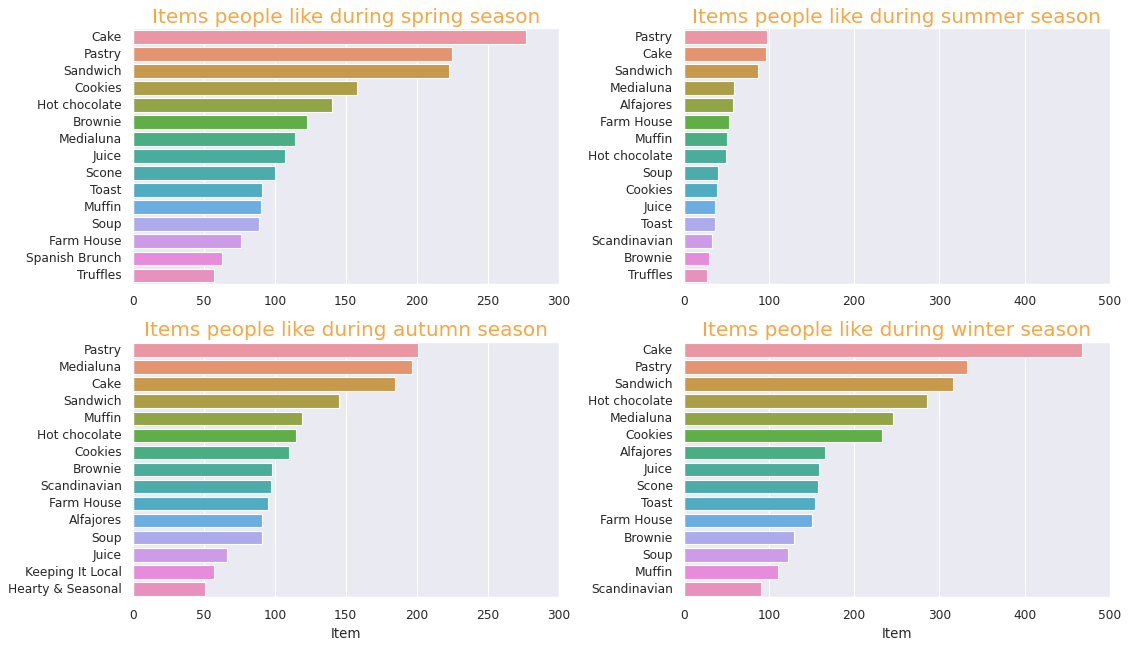

In [14]:
spring = df[(df.month=='March') | (df.month=='April') | (df.month=='May')]
summer = df[(df.month=='June') | (df.month=='July') | (df.month=='August')]
autumn = df[(df.month=='September') | (df.month=='October') | (df.month=='November')]
winter = df[(df.month=='December') | (df.month=='January') | (df.month=='February')]

fig = plt.figure(figsize=(14, 8), constrained_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
ax3, ax4 = fig.add_subplot(spec[1, 0]), fig.add_subplot(spec[1, 1])
ax1, ax2 = fig.add_subplot(spec[0, 0], sharex=ax3), fig.add_subplot(spec[0, 1], sharex=ax4)

ax = [ax1, ax2, ax3, ax4]
season = [spring, summer, autumn, winter]
s = ['spring', 'summer', 'autumn', 'winter']
for i, j , k in zip(season, ax, s):
    cond = (i.Item!='Coffee')&(i.Item!='Bread')&(i.Item!='Tea')
    i = i[cond]
    sns.barplot(y=i.Item.value_counts().head(15).index,
                x=i.Item.value_counts().head(15),orient='h', ax=j)
    j.set_title('Items people like during {} season'.format(k), color='#f7a643', fontsize=18)

ax1.set_xlabel('')
ax2.set_xlabel('')

plt.show()